##  This notebook is specifically for the datasets with NO detailed job description.
Every night at 1am
Scrape data from Indeed to create 3 csv datasets based on:
'data science data scientist' 
'data analyst data analytics'
'machine learning'

In [1817]:
import pandas as pd
from datetime import datetime, timedelta
import numpy as np
import matplotlib.pyplot as plt
from library.sb_utils import save_file

today = datetime.today().strftime('%Y_%m_%d')
dfNames=['da','ds','ml']

list_of_df = []
data = pd.DataFrame()


for n in dfNames:
    fileName = '../data/raw/{0}_last{1}d_R_{2}.csv'.format(n,'1', today)
    df = pd.read_csv(fileName, skiprows=[0])
    print(df.shape)
    
    #will be deleted after first couple of trials
    list_of_df.append(df)
    
    #combine 3 files together
    data = data.append(df, ignore_index=True)
    print(data.shape)


(651, 13)
(651, 13)
(339, 13)
(990, 13)
(104, 13)
(1094, 13)


In [1837]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1094 entries, 0 to 1093
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   JobID           1094 non-null   object 
 1   JobTitle        1094 non-null   object 
 2   Company         1094 non-null   object 
 3   Location        1094 non-null   object 
 4   CompanyRating   845 non-null    float64
 5   PostDate        1094 non-null   object 
 6   ExtractDate     1094 non-null   object 
 7   Summary         1094 non-null   object 
 8   Salary          198 non-null    object 
 9   Remote          189 non-null    object 
 10  JobUrl          1094 non-null   object 
 11  JobDetail       75 non-null     object 
 12  JobDescription  167 non-null    object 
dtypes: float64(1), object(12)
memory usage: 111.2+ KB


In [1832]:
# To confirm the necessity of the step of de-duping the combined daily file. 
id_0 = set(list_of_df[0].JobID)
id_1 = set(list_of_df[1].JobID)
id_2 = set(list_of_df[2].JobID)

In [1833]:
print(len(id_0.intersection(id_1)))
print(len(id_0.intersection(id_2)))
print(len(id_1.intersection(id_2)))

47
3
59


In [1834]:
id_0.intersection(id_1)

{'002ab7145386bc5c',
 '06bf3cb17f07f159',
 '150de5e744b86f82',
 '159bb464c886c1b5',
 '16298cafbce770f8',
 '1670d1db8bb952a3',
 '1cbbd16a3553218c',
 '2a79c3f551f9a01e',
 '2d1b8a8fc985138c',
 '3941dc0a4a5dae39',
 '3fea0641d15b7b9e',
 '4460430e0c6f49a7',
 '4a51fc40e9a6c75d',
 '4fe2199b2479f623',
 '533701b80de56590',
 '5505b8cd1b6acafa',
 '69a2d24e24f8c9cf',
 '6bd4e8e6640ff512',
 '72d247b2551fd568',
 '7848f18567442e59',
 '804cac643f060e79',
 '8269f59700883f23',
 '8484bc4daf8d621d',
 '86513355697c386d',
 '8751b934ae96c566',
 '89fcf7261719cb0b',
 '9607084150060232',
 '9b192b4e01d14d16',
 'a04de283bf3c1fd9',
 'ad6674fbee1a0c19',
 'af29945147fe316e',
 'b0277c763fc7b5e8',
 'b247c4f3788f08f8',
 'b72947875a8fe720',
 'ba1cbfca0e1da485',
 'c148abb0b7e6169d',
 'c361cb5927976bb5',
 'c90349ba189936a3',
 'cc83b3fbd7ffe1dd',
 'd7cee3ad9af04e77',
 'db6ec9f6ef335c3e',
 'dbd5dd87bb053726',
 'dce3fa9d015404f3',
 'e39bf99e4e63f1cf',
 'e447fed7ec1457dc',
 'f2611dd107a93b1a',
 'fdabb2fa76839ff3'}

In [1838]:
list_of_df[1].loc[list_of_df[1].JobID =='fdabb2fa76839ff3']

,JobID,JobTitle,Company,Location,CompanyRating,PostDate,ExtractDate,Summary,Salary,Remote,JobUrl,JobDetail,JobDescription
238,fdabb2fa76839ff3,Senior Analyst – Data Science & Business Intel...,Daimler,"Portland, OR",4.1,Today,2021-02-20,Apply data analysis tools in a dynamic environ...,NaN,NaN,https://www.indeed.com/viewjob?jk=fdabb2fa7683...,NaN,NaN


In [1839]:
list_of_df[0].loc[list_of_df[0].JobID =='fdabb2fa76839ff3']

,JobID,JobTitle,Company,Location,CompanyRating,PostDate,ExtractDate,Summary,Salary,Remote,JobUrl,JobDetail,JobDescription
459,fdabb2fa76839ff3,Senior Analyst – Data Science & Business Intel...,Daimler,"Portland, OR",4.1,Today,2021-02-20,Apply data analysis tools in a dynamic environ...,NaN,NaN,https://www.indeed.com/viewjob?jk=fdabb2fa7683...,NaN,NaN


In [1840]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1094 entries, 0 to 1093
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   JobID           1094 non-null   object 
 1   JobTitle        1094 non-null   object 
 2   Company         1094 non-null   object 
 3   Location        1094 non-null   object 
 4   CompanyRating   845 non-null    float64
 5   PostDate        1094 non-null   object 
 6   ExtractDate     1094 non-null   object 
 7   Summary         1094 non-null   object 
 8   Salary          198 non-null    object 
 9   Remote          189 non-null    object 
 10  JobUrl          1094 non-null   object 
 11  JobDetail       75 non-null     object 
 12  JobDescription  167 non-null    object 
dtypes: float64(1), object(12)
memory usage: 111.2+ KB


### Step 1: De - duplicate records with same JobID
There are overlaps after combining 3 files together


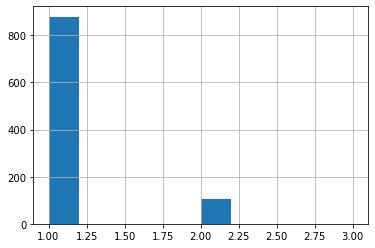

In [1841]:
data.JobID.value_counts().hist()

In [1842]:
#Group by column having count > 1 
#data.groupby('JobID').filter(lambda x: len(x) >1 ).sort_values('JobID')

In [1843]:
data.JobID.describe()

count                 1094
unique                 986
top       69a2d24e24f8c9cf
freq                     3
Name: JobID, dtype: object

In [1844]:
# To de-dup the records in the combined file
data.drop_duplicates(subset = 'JobID', inplace= True)
data.JobID.describe()

count                  986
unique                 986
top       3162c7babf66a431
freq                     1
Name: JobID, dtype: object

In [1845]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 986 entries, 0 to 1093
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   JobID           986 non-null    object 
 1   JobTitle        986 non-null    object 
 2   Company         986 non-null    object 
 3   Location        986 non-null    object 
 4   CompanyRating   759 non-null    float64
 5   PostDate        986 non-null    object 
 6   ExtractDate     986 non-null    object 
 7   Summary         986 non-null    object 
 8   Salary          184 non-null    object 
 9   Remote          165 non-null    object 
 10  JobUrl          986 non-null    object 
 11  JobDetail       61 non-null     object 
 12  JobDescription  142 non-null    object 
dtypes: float64(1), object(12)
memory usage: 107.8+ KB


In [1846]:
# To reindex 
data.index = np.arange(0,len(data))

### Step 2: Create a new variable 'DatePosted' as the exact date of job posted

In [1847]:
data.PostDate.unique()

array(['1 day ago', 'Today', 'Just posted'], dtype=object)

In [1848]:
data.PostDate.str.contains('ago').sum()

223

In [1849]:
'|'.join(['ago','day','days'])

'ago|day|days'

In [1850]:
# To create a new variable 'DatePosted' by remove the string and convert to int
data['DatePosted'] = data.PostDate.str.replace('day ago|days ago','').str.replace('Today|Just posted','0').str.strip().astype(int)

In [1851]:
data.DatePosted.unique()

array([1, 0])

In [1852]:
data.DatePosted.dtypes

dtype('int32')

In [1853]:
# To convert 'ExtractDate' to datetime type
data['ExtractDate'] = pd.to_datetime(data['ExtractDate'])

In [1854]:
# To Convert 'DatePosted' from int to timeDelta type and compute the exact date when the job was posted 
data.DatePosted = pd.to_timedelta(data.DatePosted, unit='D')
data.DatePosted = pd.to_datetime(data['ExtractDate'] - data['DatePosted'])


In [1855]:
data.loc[:,['PostDate','ExtractDate','DatePosted']]

,PostDate,ExtractDate,DatePosted
0,1 day ago,2021-02-20,2021-02-19
1,Today,2021-02-20,2021-02-20
2,Today,2021-02-20,2021-02-20
3,Today,2021-02-20,2021-02-20
4,Today,2021-02-20,2021-02-20
...,...,...,...
981,Today,2021-02-20,2021-02-20
982,Today,2021-02-20,2021-02-20
983,1 day ago,2021-02-20,2021-02-19
984,Today,2021-02-20,2021-02-20


### Step 3: Create a new variable 'isRemote' and assign boolean value based on varible 'Remote' OR 'Location'

In [1856]:
data.Remote.unique()

array([nan, 'Temporarily remote', 'Remote'], dtype=object)

In [1857]:
data.Remote.describe()

count        165
unique         2
top       Remote
freq          98
Name: Remote, dtype: object

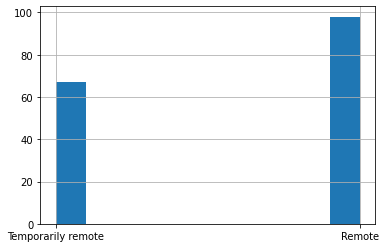

In [1858]:
data.Remote.hist()

In [1859]:
data.Location.str.contains('Remote').sum()

44

In [1860]:
(data.Location =='Remote').sum()

44

In [1861]:
# To assign the value of Remote to the variable 'Remote' if the value of location is 'Remote'
# It maynot be necessary since we not going to use varialbe 'Remote' later
#data.loc[data.Location.str.contains('Remote'),'Remote'] = 'Remote'

In [1868]:
(data.Remote == 'Remote') | (data.Location =='Remote')

0      False
1      False
2      False
3      False
4      False
       ...  
981    False
982    False
983    False
984    False
985    False
Length: 986, dtype: bool

In [1869]:
# To create a new boolean variable 'isRemote' and assign Ture if varible 'Remote' OR 'Location' is Remote
data['isRemote'] = (data.Remote == 'Remote') | (data.Location =='Remote')
data.isRemote.describe()

count       986
unique        2
top       False
freq        844
Name: isRemote, dtype: object

### Step 4: Extract city, state information from Location, Create new variables 'City', ‘State', and 'Region' 


In [1870]:
data.Location.describe()

count              986
unique             348
top       New York, NY
freq                57
Name: Location, dtype: object

In [1871]:
# To create two new variables City and State
newDf = data.Location.str.split(pat =',',expand =True)
data['City'] = newDf[0]
data['State'] = newDf[1]

In [1872]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 986 entries, 0 to 985
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   JobID           986 non-null    object        
 1   JobTitle        986 non-null    object        
 2   Company         986 non-null    object        
 3   Location        986 non-null    object        
 4   CompanyRating   759 non-null    float64       
 5   PostDate        986 non-null    object        
 6   ExtractDate     986 non-null    datetime64[ns]
 7   Summary         986 non-null    object        
 8   Salary          184 non-null    object        
 9   Remote          209 non-null    object        
 10  JobUrl          986 non-null    object        
 11  JobDetail       61 non-null     object        
 12  JobDescription  142 non-null    object        
 13  DatePosted      986 non-null    datetime64[ns]
 14  isRemote        986 non-null    bool          
 15  City  

In [1873]:
# To clean up values of City
data.loc[data.City == 'Remote', 'City'] = np.nan
data.loc[data.City == 'United States', 'City'] = np.nan

In [1874]:
assert data.City.str.contains('Remote|United States').any()  == False

In [1875]:
us_state_abbrev = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'American Samoa': 'AS',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'District of Columbia': 'DC',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Guam': 'GU',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Northern Mariana Islands':'MP',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Pennsylvania': 'PA',
    'Puerto Rico': 'PR',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virgin Islands': 'VI',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY'
}

In [1876]:
data.loc[((data.State.isnull()) & (~data.City.isnull())), 'City']


28              Arizona
58             Michigan
59        Massachusetts
93        Massachusetts
198               Texas
211            Colorado
213               Texas
228      New York State
343           Minnesota
356             Georgia
360          California
361            Maryland
372           Wisconsin
437               Texas
448               Texas
497         Mississippi
512      New York State
586               Texas
598          California
708      New York State
732    Washington State
918        Pennsylvania
961         Mississippi
973       Massachusetts
983       Massachusetts
985         Mississippi
Name: City, dtype: object

In [1877]:
# To fill the value of State from City for those which has only location of State 
data.State.fillna(data.City, inplace=True)

In [1878]:
# To clean up value of City
data.loc[data.State == data.City, 'City'] = np.nan

In [1882]:
data.State.unique()

array(['GA', 'MN', 'VA', 'MI', 'NJ', 'TX', nan, 'NY', 'MA', 'FL', 'SC',
       'AZ', 'PA', 'AL', 'DC', 'CA', 'WI', 'IL', 'NV', 'CT', 'AR', 'KY',
       'CO', 'NC', 'MS', 'OH', 'IA', 'IN', 'ME', 'WA', 'MD', 'RI', 'DE',
       'TN', 'MO', 'PR', 'OR', 'NE', 'HI', 'ID', 'MT', 'UT', 'SD', 'LA',
       'NH'], dtype=object)

In [1883]:
# To extract State abbrevation value from City variables to fill those missing values into 'State'
data.loc[data.State.str.len() >3,'State']=data.loc[data.State.str.len() >3,'State'].str.replace(' State','').map(us_state_abbrev)



In [1884]:
# To clean up the State values
data.State= data.State.str.strip()

In [1885]:
data.loc[:,['Location','City','State']]

,Location,City,State
0,"Atlanta, GA",Atlanta,GA
1,"Minneapolis, MN",Minneapolis,MN
2,"Richmond, VA",Richmond,VA
3,"Midland, MI",Midland,MI
4,"New Brunswick, NJ",New Brunswick,NJ
...,...,...,...
981,"Brooklyn, NY",Brooklyn,NY
982,"Lexington, KY",Lexington,KY
983,Massachusetts,NaN,MA
984,"Philadelphia, PA",Philadelphia,PA


In [1947]:
# To cleaning up the value of 'Washington DC' on variable 'City'
data.loc[(data.City == 'Washington') & (data.State == 'DC'), 'City'] ='DC'

In [1946]:
# special cases "New York, NY"
data.loc[data.City.isin(us_state_abbrev.keys()), ['Location','City','State']]

,Location,City,State
11,"New York, NY",New York,NY
22,"New York, NY",New York,NY
27,"New York, NY",New York,NY
37,"New York, NY",New York,NY
57,"Delaware, AR",Delaware,AR
64,"New York, NY",New York,NY
72,"New York, NY",New York,NY
74,"New York, NY",New York,NY
78,"New York, NY",New York,NY
81,"New York, NY",New York,NY


In [1887]:
data.State.unique()

array(['GA', 'MN', 'VA', 'MI', 'NJ', 'TX', nan, 'NY', 'MA', 'FL', 'SC',
       'AZ', 'PA', 'AL', 'DC', 'CA', 'WI', 'IL', 'NV', 'CT', 'AR', 'KY',
       'CO', 'NC', 'MS', 'OH', 'IA', 'IN', 'ME', 'WA', 'MD', 'RI', 'DE',
       'TN', 'MO', 'PR', 'OR', 'NE', 'HI', 'ID', 'MT', 'UT', 'SD', 'LA',
       'NH'], dtype=object)

In [1888]:
# To categorize state value into 4 regions 
us_state_regions = {
    'Alabama': 'South',
    'Alaska': 'West',
    'American Samoa': 'Islands',
    'Arizona': 'West',
    'Arkansas': 'South',
    'California': 'West',
    'Colorado': 'West',
    'Connecticut': 'Northeast',
    'Delaware': 'South',
    'District of Columbia': 'South',
    'Florida': 'South',
    'Georgia': 'South',
    'Guam': 'Islands',
    'Hawaii': 'West',
    'Idaho': 'West',
    'Illinois': 'Midwest',
    'Indiana': 'Midwest',
    'Iowa': 'Midwest',
    'Kansas': 'Midwest',
    'Kentucky': 'South',
    'Louisiana': 'South',
    'Maine': 'Northeast',
    'Maryland': 'South',
    'Massachusetts': 'Northeast',
    'Michigan': 'Midwest',
    'Minnesota': 'Midwest',
    'Mississippi': 'South',
    'Missouri': 'Midwest',
    'Montana': 'West',
    'Nebraska': 'Midwest',
    'Nevada': 'West',
    'New Hampshire': 'Northeast',
    'New Jersey': 'Northeast',
    'New Mexico': 'West',
    'New York': 'Northeast',
    'North Carolina': 'South',
    'North Dakota': 'Midwest',
    'Northern Mariana Islands':'Islands',
    'Ohio': 'Midwest',
    'Oklahoma': 'South',
    'Oregon': 'West',
    'Pennsylvania': 'Northeast',
    'Puerto Rico': 'Islands',
    'Rhode Island': 'Northeast',
    'South Carolina': 'South',
    'South Dakota': 'Midwest',
    'Tennessee': 'South',
    'Texas': 'South',
    'Utah': 'West',
    'Vermont': 'Northeast',
    'Virgin Islands': 'Islands',
    'Virginia': 'South',
    'Washington': 'West',
    'West Virginia': 'South',
    'Wisconsin': 'Midwest',
    'Wyoming': 'West'
}

In [1889]:
us_state_regions_mapping =  {v: us_state_regions[k] for k, v in us_state_abbrev.items()}

In [1890]:
data['Region'] = data.loc[~data.State.isnull(),'State'].map(us_state_regions_mapping).astype('category')

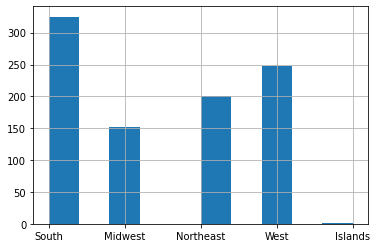

In [1891]:
data.Region.hist()

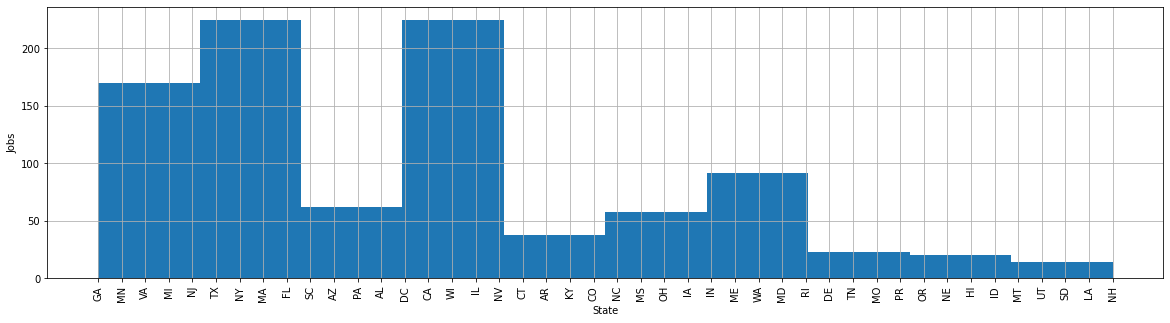

In [1892]:
# To do: Y label is not correct
plt.subplots(figsize=(20, 5))
data.State.hist()
plt.xticks(rotation='vertical')
plt.ylabel('Jobs')
plt.xlabel('State');
plt.show()

In [1893]:
data.groupby('City').filter(lambda x: len(x) >3 )['City'].value_counts().sort_values(ascending=False)

New York            57
Seattle             38
Washington          34
Chicago             29
Boston              21
San Francisco       21
Atlanta             20
Arlington           16
Dallas              14
Raleigh             12
Austin              11
Plano               10
San Diego           10
Tampa               10
Mountain View       10
Herndon              9
Charlotte            9
Denver               8
Minneapolis          8
Philadelphia         8
Phoenix              8
Saint Paul           7
Columbus             7
Ann Arbor            7
Newark               7
Los Angeles          7
Indianapolis         7
Baltimore            7
Brooklyn             7
Jacksonville         6
Brentwood            6
Irvine               6
San Antonio          6
Scottsdale           5
Richmond             5
Jersey City          5
Detroit              5
Princeton            5
Santa Clara          5
Salt Lake City       5
Durham               4
Pittsburgh           4
Springfield          4
Beaverton  

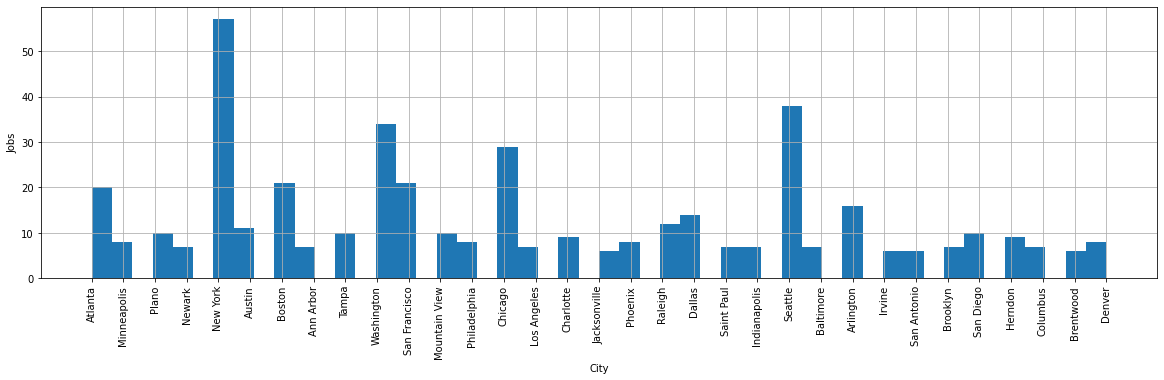

In [1894]:
# To Do: the Y label is not correct   ????  bins size
plt.subplots(figsize=(20, 5))
data.groupby('City').filter(lambda x: len(x) >5 )['City'].hist(bins =50)
plt.xticks(rotation='vertical')
plt.ylabel('Jobs')
plt.xlabel('City');
plt.show()

In [1895]:
data.City.value_counts()

New York             57
Seattle              38
Washington           34
Chicago              29
Boston               21
                     ..
Mesa                  1
Lumberton             1
Raritan               1
Huntingdon Valley     1
Plainfield            1
Name: City, Length: 322, dtype: int64

In [1896]:
data.City.str.contains('Princeton').sum()

5

### Step 5: Create new variables 'isSenior', 'isJunior', and 'isMid' from job Title

In [1897]:
data.JobTitle.unique()

array(['Data & Analytics Analyst', 'Data Quality Analyst I',
       'Salesforce Business Analyst',
       'Early Childhood Specialist/Data Analyst',
       'Data and Reporting Analyst', 'Data Associate',
       'Analyst, Data Science', 'Data Research Analyst',
       'Data Analyst – Public Health Reporting', 'Data Specialist',
       'Data Analyst', 'Analyst, Data Science - Product Analytics',
       'Engineering Analyst - Big Data',
       'Data Analyst Internship - Remote',
       'Data Analyst - 100% Remote / W2', 'Director, Data Analytics',
       'Associate Data Analyst', 'Business Analyst',
       'DATA ANALYST - 60049485 1',
       'Anti-Abuse Data & Operations Analyst - Fraud Operations',
       'Data Analyst II (Healthcare Analytics)',
       'Data Analyst - Part Time, 100% Remote',
       'Advanced Data Analytics Associate',
       'Data Analyst I, WGU Advancement',
       'Analyst - Analytics and Data Science I-III (SAS Experience)',
       'Data analytics program Manager', 

In [1898]:
# these may not be necessary
#data['JobTitle'] = data['JobTitle'].astype('str')
#type(data.JobTitle[0])

In [1899]:
data['isSenior'] = data.JobTitle.str.contains('Senior|Sr|sr|Director|VP|Lead|Principal')

In [1900]:
data['isJunior'] = data.JobTitle.str.contains('Junior|Jr|jr|Intern')

In [1901]:
data['isMid'] = data.JobTitle.str.contains('Mid Level|Mid-')

In [1902]:
data.loc[:, ['JobTitle','isSenior','isJunior','isMid']].head(3)

,JobTitle,isSenior,isJunior,isMid
0,Data & Analytics Analyst,False,False,False
1,Data Quality Analyst I,False,False,False
2,Salesforce Business Analyst,False,False,False


In [1903]:
data[data.JobTitle.str.contains('Mid Level|Mid-')]

,JobID,JobTitle,Company,Location,CompanyRating,PostDate,ExtractDate,Summary,Salary,Remote,...,JobDetail,JobDescription,DatePosted,isRemote,City,State,Region,isSenior,isJunior,isMid
734,47a27cf60ece43cb,Mid Level - Data Scientist,Parsons,"Washington, DC",4.0,Today,2021-02-20,Will also provide support in the acquisition o...,NaN,NaN,...,NaN,NaN,2021-02-20,False,Washington,DC,South,False,False,True


### Step 6: Process Salary data, and create new variables SalaryMidValue and SalaryGroup 

In [1904]:
# string, dict, list appear as Object in df, however, the type can be tested as individual cell
# data.Salary = data.Salary.astype(str) # this cause missing value from NaN to 'nan'
type(data.Salary[0])


float

In [1905]:
# the $ that prevents the substring to be found
data.Salary.str.contains('103,690 ').sum()

2

In [1906]:
data.loc[data.Salary =='$103,690 - $134,798 a year']

,JobID,JobTitle,Company,Location,CompanyRating,PostDate,ExtractDate,Summary,Salary,Remote,...,JobDetail,JobDescription,DatePosted,isRemote,City,State,Region,isSenior,isJunior,isMid
856,b32ba7b8c4cc021a,Health Statistician PD 14R045 - HIV/AIDS Bureau,US Department of Health And Human Services,"Rockville, MD",4.1,Today,2021-02-20,To handle large data set manipulations and ana...,"$103,690 - $134,798 a year",Remote,...,"Job detailsSalary$103,690 - $134,798 a yearJob...",Duties\nSummary\nThese positions are located i...,2021-02-20,True,Rockville,MD,South,False,False,False


In [1907]:
data.Salary.unique()

array([nan, '$30 an hour', '$45,000 - $87,000 a year',
       '$49,546 - $113,840 a year', '$20 - $24 an hour',
       '$45 - $50 an hour', 'From $95,000 a year', '$65,000 a year',
       '$80 - $84 an hour', '$60,000 - $70,000 a year',
       'Up to $70,000 a year', '$75,504 - $85,000 a year',
       '$42,245 - $100,432 a year', '$40 - $50 an hour',
       '$20 - $22 an hour', '$75,000 - $100,000 a year',
       '$50,000 - $58,000 a year', '$66,828 - $132,964 a year',
       '$60,000 - $80,000 a year', '$38,000 - $48,000 a year',
       '$55 - $70 an hour', 'Up to $40,000 a year',
       '$55,000 - $65,000 a year', '$29 - $31 an hour',
       'Up to $60,000 a year', '$97,000 a year', 'Up to $16 an hour',
       '$55,000 - $60,000 a year', 'From $92,000 a year',
       '$31 - $33 an hour', '$101,100 a year', '$50 an hour',
       '$30 - $38 an hour', '$75,600 - $109,300 a year',
       '$50 - $65 an hour', '$65,001 - $75,000 a year',
       'From $40,000 a year', 'From $31 an hour', 'U

In [1908]:
data.loc[data.Salary.str.contains('day', na=False)]

,JobID,JobTitle,Company,Location,CompanyRating,PostDate,ExtractDate,Summary,Salary,Remote,...,JobDetail,JobDescription,DatePosted,isRemote,City,State,Region,isSenior,isJunior,isMid


In [1909]:
# To create a new variable 'SalaryUnit'
data['SalaryUnit'] = data.Salary.str.extract('(an hour|a year|a month|a week|per class|a day)', expand = True)
data['SalaryUnit'].unique()

array([nan, 'an hour', 'a year', 'a month'], dtype=object)

In [1910]:
# To create a new variable 'SalaryMidValue' going to contain the mid point value for the arrange of salary
data['SalaryMidValue'] = data['Salary'].str.replace('an hour|a year|a month|a week|per class|a day','').str.replace('$','').str.replace(',','')
#data.loc[~data.Salary.isnull(),['Salary','SalaryUnit','SalaryMidValue']].head(40)

In [1911]:
# Set busniss rule to treat range 
# Ignore 'Up to' and 'From' 
data['SalaryMidValue'] = data.SalaryMidValue.str.replace('Up to|From','').str.strip()
#data.SalaryMidValue.unique()

In [1912]:
# Take mid value for range salary
s_df = data.SalaryMidValue.str.split(pat ='-',expand =True)
s_df[1].fillna(s_df[0], inplace=True)

data['SalaryMidValue']  = (s_df[1].astype(float)+s_df[0].astype(float))/2


In [1913]:
data.loc[~data.Salary.isnull(),['Salary','SalaryUnit','SalaryMidValue']]

,Salary,SalaryUnit,SalaryMidValue
3,$30 an hour,an hour,30.0
5,"$45,000 - $87,000 a year",a year,66000.0
8,"$49,546 - $113,840 a year",a year,81693.0
9,$20 - $24 an hour,an hour,22.0
16,$45 - $50 an hour,an hour,47.5
...,...,...,...
953,"$61,172 a year",a year,61172.0
954,"$104,176 - $138,439 a year",a year,121307.5
956,"Up to $120,000 a year",a year,120000.0
967,"$93,494 - $121,543 a year",a year,107518.5


In [1914]:
# Convert hourly rate to Salary based on formula hr * 40 * 52 
data.loc[data.SalaryUnit.str.contains('hour', na=False),'SalaryMidValue'] = data.SalaryMidValue * 40 * 52

In [1915]:
# Convert monthly rate to Salary based on formula mr * 12
data.loc[data.SalaryUnit.str.contains('month', na=False),'SalaryMidValue'] = data.SalaryMidValue * 12

In [1916]:
# Convert weekly rate to Salary based on fomula wr * 52 
data.loc[data.SalaryUnit.str.contains('week', na = False), 'SalaryMidValue'] =data.SalaryMidValue * 52

In [1917]:
# Convert daily rate to Salary based on formula dr * 5 * 52
data.loc[data.SalaryUnit.str.contains('day', na=False),'SalaryMidValue'] = data.SalaryMidValue * 5 * 52

In [1918]:
# Ignore the teaching job
data.loc[data.SalaryUnit.str.contains('class', na=False),'SalaryMidValue'] = np.nan

In [1921]:
data.SalaryMidValue.describe()

count       184.000000
mean      89008.301087
std       31266.432003
min       32985.000000
25%       64480.000000
50%       86416.000000
75%      109200.000000
max      170560.000000
Name: SalaryMidValue, dtype: float64

In [1922]:
data.loc[data.SalaryMidValue == 32985.000000]

,JobID,JobTitle,Company,Location,CompanyRating,PostDate,ExtractDate,Summary,Salary,Remote,...,DatePosted,isRemote,City,State,Region,isSenior,isJunior,isMid,SalaryUnit,SalaryMidValue
488,b4cd0aa0cb5c0666,IT Business Support Analyst,Georgia Department of Public Health,"Augusta, GA",3.5,Today,2021-02-20,Installs and/or upgrades software on PC's as i...,"$32,970 - $33,000 a year",NaN,...,2021-02-20,False,Augusta,GA,South,False,False,False,a year,32985.0


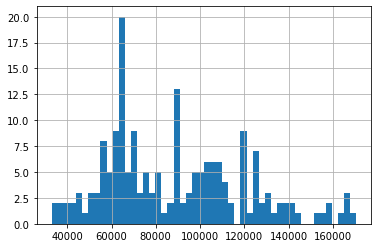

In [1923]:
data.SalaryMidValue.hist(bins =50)

In [1942]:
data.Salarydata.SalaryMidValue.min()

32985.0

In [1924]:
# Create SalaryGroup for SalaryMidValue variable
salaryGroupLabels = ['20K-50K','50K-75k','75k-100k','100k-125k','125k+']
salaryRanges =[20000, 50000, 75000, 100000, 125000, np.inf]
data['SalaryGroup'] = pd.cut(data.SalaryMidValue, bins = salaryRanges, labels = salaryGroupLabels)
#data['SalaryGroup'] = pd.qcut(data.SalaryMidValue, q=5, labels = salaryGroupLabels)
data.loc[~data.Salary.isnull(),['Salary','SalaryUnit','SalaryMidValue','SalaryGroup']]

,Salary,SalaryUnit,SalaryMidValue,SalaryGroup
3,$30 an hour,an hour,62400.0,50K-75k
5,"$45,000 - $87,000 a year",a year,66000.0,50K-75k
8,"$49,546 - $113,840 a year",a year,81693.0,75k-100k
9,$20 - $24 an hour,an hour,45760.0,20K-50K
16,$45 - $50 an hour,an hour,98800.0,75k-100k
...,...,...,...,...
953,"$61,172 a year",a year,61172.0,50K-75k
954,"$104,176 - $138,439 a year",a year,121307.5,100k-125k
956,"Up to $120,000 a year",a year,120000.0,100k-125k
967,"$93,494 - $121,543 a year",a year,107518.5,100k-125k


In [1925]:
data.SalaryGroup.value_counts().sort_index()

20K-50K      12
50K-75k      70
75k-100k     35
100k-125k    45
125k+        22
Name: SalaryGroup, dtype: int64

In [1926]:
((data.SalaryMidValue <= 125000) & (data.SalaryMidValue > 100000)).sum()

45

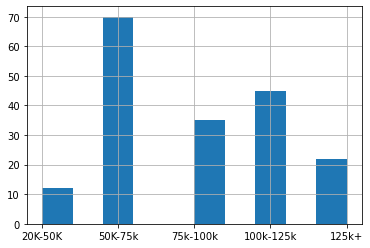

In [1927]:
data.SalaryGroup.sort_values().hist()

In [1928]:
assert data.SalaryMidValue.min() > 10000  

In [1929]:
(data.SalaryMidValue < 100000).sum()

117

In [1930]:
data.SalaryMidValue.isnull().sum()

802

### Pandas profiling 

In [1931]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [1932]:
# uncomment and run below if you need to pip install the pandas-profiling library
#import sys
#!{sys.executable} -m pip install -U pandas-profiling==2.9.0
#!jupyter nbextension enable --py widgetsnbextension

In [1933]:
from pathlib import Path

import pandas_profiling
from pandas_profiling.utils.cache import cache_file

In [1934]:
report = data.profile_report(sort='None', html={'style':{'full_width': True}}, progress_bar=False)
report

In [1935]:
profile_report = data.profile_report(html={'style': {'full_width': True}})
profile_report.to_file("../reports/pandas_profiling/{0}_daily.html".format(today))

In [1500]:
#To do list: 
# check missing state  : done ! 
# categorize state: done !
# check dup id : done ! 
# salay categorizing : done!
# remove unneeded columns, save in the interim folder: done!
# run today's data without dedup line in the data collection loop:   done!
# run 2021_02_17 again to fix monthly salary data error: not necessary, since we may not using those data.  done!
# To check detailed description with np.nan value: done!

# make library using package: __init__.py
# put it together after a week of trials: 
# find a better way to split Location, to auto treat the case which only contains state information but not ','
# To check the result with new search string in use for more relevence, especially look for salary data: done! 
# with incomplete data set with ML, the lowest salary is increased to 33000, which support our keyword search modification.
# tomorrow will check 


# Note:
# Special cases "New York, NY", for variable City and State

# Job Title: not for cleaning stage but later for EDA.  
# company frequency - company rating : not for cleaning stage but later for EDA. 
# location: not for cleaning stage but later for EDA. 

# Note:
# 1: some big companies could have up to two digits job posting within one day. I can dive deep into analysis on specific 
# company 
# 2: may consider not including data analyst or analytics, ...tried without ','

In [1936]:
data.State.unique()

array(['GA', 'MN', 'VA', 'MI', 'NJ', 'TX', nan, 'NY', 'MA', 'FL', 'SC',
       'AZ', 'PA', 'AL', 'DC', 'CA', 'WI', 'IL', 'NV', 'CT', 'AR', 'KY',
       'CO', 'NC', 'MS', 'OH', 'IA', 'IN', 'ME', 'WA', 'MD', 'RI', 'DE',
       'TN', 'MO', 'PR', 'OR', 'NE', 'HI', 'ID', 'MT', 'UT', 'SD', 'LA',
       'NH'], dtype=object)

In [1937]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 986 entries, 0 to 985
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   JobID           986 non-null    object        
 1   JobTitle        986 non-null    object        
 2   Company         986 non-null    object        
 3   Location        986 non-null    object        
 4   CompanyRating   759 non-null    float64       
 5   PostDate        986 non-null    object        
 6   ExtractDate     986 non-null    datetime64[ns]
 7   Summary         986 non-null    object        
 8   Salary          184 non-null    object        
 9   Remote          209 non-null    object        
 10  JobUrl          986 non-null    object        
 11  JobDetail       61 non-null     object        
 12  JobDescription  142 non-null    object        
 13  DatePosted      986 non-null    datetime64[ns]
 14  isRemote        986 non-null    bool          
 15  City  

### Save the dataset in interim folder

In [1938]:
data.shape

(986, 24)

In [1939]:
# Drop few columns not needed for further analysis
s_data = data.drop(columns = ['PostDate','ExtractDate','Salary', 'SalaryUnit','Remote', 'JobUrl'])

In [1940]:
s_data.shape

(986, 18)

In [1941]:
# save the data to a new csv file

from library.sb_utils import save_file
#from ..src.library.sb_utils import save_file
datapath = '../data/interim/'
fileName = '{0}_daily.csv'.format(today)
save_file(s_data, fileName, datapath)

Writing file.  "../data/interim/2021_02_20_daily.csv"


In [1507]:
data.loc[data.Company.str.contains('Amazon',na=False)]

,JobID,JobTitle,Company,Location,CompanyRating,PostDate,ExtractDate,Summary,Salary,Remote,...,isRemote,City,State,Regions,isSenior,isJunior,isMid,SalaryUnit,SalaryMidValue,SalaryGroup
59,d4da7bd016402c44,Data Analytics Co-op,Amazon.com Services LLC,Massachusetts,3.6,Today,2021-02-18,Exposure to best practices in data analytics a...,NaN,NaN,...,False,Massachusetts,MA,Northeast,False,False,False,NaN,NaN,NaN
84,e805404e343d9a71,Data Engineer - FinTech,Amazon.com Services LLC,"Jersey City, NJ",3.6,Today,2021-02-18,"Experience with data modeling, data warehousin...",NaN,NaN,...,False,Jersey City,NJ,Northeast,False,False,False,NaN,NaN,NaN
209,0edc7ff6d7081d74,Big Data Engineer,Amazon.com Services LLC,"New York, NY",3.6,Today,2021-02-18,"Strong knowledge of data warehousing concepts,...",NaN,NaN,...,False,New York,NY,Northeast,False,False,False,NaN,NaN,NaN
389,c56292dac7286c28,Data Engineer,Amazon.com Services LLC,"Seattle, WA",3.6,Today,2021-02-18,"Improve upon the data ingestion models, ETL jo...",NaN,NaN,...,False,Seattle,WA,West,False,False,False,NaN,NaN,NaN
404,f6475cf8086fe225,Data Scientist,Amazon.com Services LLC,"Seattle, WA",3.6,Today,2021-02-18,"Or statistical/mathematical software (e.g. R, ...",NaN,NaN,...,False,Seattle,WA,West,False,False,False,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2346,cc709a46d643e377,Systems & Product Integration Co-op,Amazon.com Services LLC,Massachusetts,3.6,Today,2021-02-18,Amazon Robotics automates fulfilment center op...,NaN,NaN,...,False,Massachusetts,MA,Northeast,False,False,False,NaN,NaN,NaN
2350,64322ae596bcc9d2,Senior Technical Writer,"Amazon Dev Center U.S., Inc.","Seattle, WA",3.6,Today,2021-02-18,BS in computer science or a degree in technica...,NaN,NaN,...,False,Seattle,WA,West,True,False,False,NaN,NaN,NaN
2351,93846c58e6b11056,Technical Support Engineer Co-op,Amazon.com Services LLC,Massachusetts,3.6,Today,2021-02-18,Amazon Robotics automates fulfilment center op...,NaN,NaN,...,False,Massachusetts,MA,Northeast,False,False,False,NaN,NaN,NaN
2373,aa94ab89a3194771,Senior Embedded Software Engineer,Amazon.com Services LLC,"Seattle, WA",3.6,Today,2021-02-18,"Designed and custom-built by Amazonians, our t...",NaN,NaN,...,False,Seattle,WA,West,True,False,False,NaN,NaN,NaN
